# Table of Contents

* [A. The main aspects of EDA](#Section-one)
* [B. Steps going to be followed](#Section-two)
     * [Getting an overview](#subsection-one-of-section-1)
     * [Univariate Analysis](#subsection-two-of-section-1)
     * [Bivariate Analysis](#subsection-three-of-section-1)
* [Calling the packages](#Section-three)
* [Importing Datasets](#Section-four)
* [Observing the datasets](#Section-five)
* [Univariate Analysis](#Section-six)
* [Bivariate Analysis](#Section-seven)
* [Feature Engineering](#Section-eight)
* [Multivariate Analysis](#Section-nine)
* [Logistic Regression](#Section-ten)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Before jumping directly to the code, we should know little about the Exploratory Data Analysis(EDA).
<a id="Section-one" ></a>
# **A. The main aspects of EDA**
* Understanding data structures
* Identifying patterns and relationships
* Detecting anomalies and outliers
* Testing assumptions
* Handling missing values
* feature engineering
* Analysis and reporting
* Model building


<a id="Section-two" ></a>
# **B. Steps going to be followed** 

<a id="subsection-one-of-section-1" ></a>
# i. Getting a overview of data such as dimension of the data, data types of the columns etc.
<a id="subsection-two-of-section-1" ></a>
# ii. Univariate analysis

#####   a) Steps of doing Univariate Analysis on Numerical columns

- **Descriptive Statistics**: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

- **Visualizations**: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

- **Identifying Outliers**: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

- **Skewness**: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

- **Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

##### b) Steps of doing Univariate Analysis on Categorical columns

- **Descriptive Statistics**: Compute the frequency distribution of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.

- **Visualizations**: Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.

- **Missing Values**: Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.

- **Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.
####  Then we will proceed for bivariate and multivariate analysis.
 #####         It focuses on scritinizing any patterns or relationships between two or more number of variables.
 
<a id="subsection-three-of-section-1" ></a>
# iii. Bivariate analysis
- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps
        
- Write your conclusions

<a id="Section-three" ></a>
# **1.  Calling the packages**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

<a id="Section-four" ></a>
# **2.  Importing Datasets**

In [3]:
# Importing datasets

df = pd.read_csv('/kaggle/input/titanic/train.csv')

<a id="Section-five" ></a>
# **3. Observing the datasets**

In [4]:
# shape of the datasets
rows, columns = df.shape
print(f"There are {rows} no of rows and {columns} no of columns.")

There are 891 no of rows and 12 no of columns.


In [5]:
# head of the datasets
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# getting the name of columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# getting data types of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Conclusion :
* There are 891 rows and 12 columns.
* The column 'Age','Cabin' and 'Embarked' consist null values (*we will visualize this later*)

<a id="Section-six" ></a>
# **4. Univariate analysis**

### **4.1 Age**

In [8]:
# descriptive summary
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


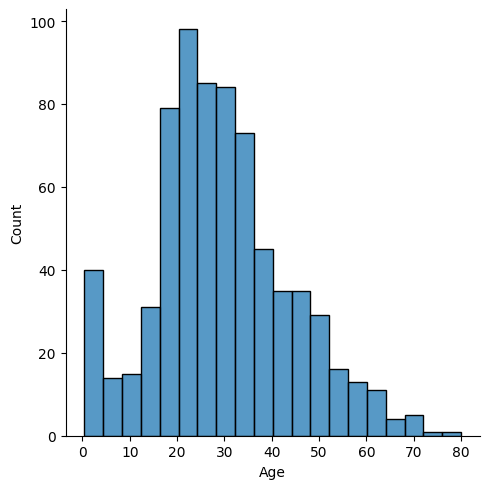

In [9]:
# histogram
sns.displot(df,x='Age',bins=20,kind='hist')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


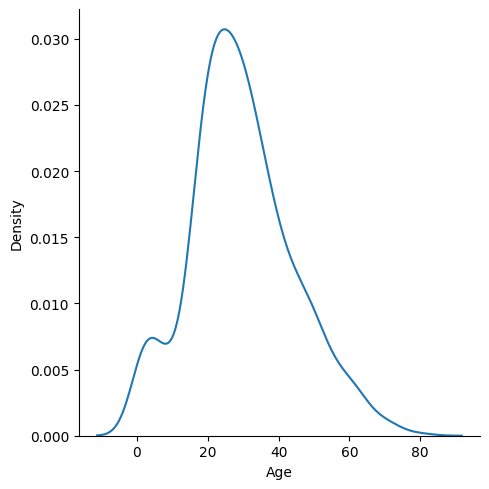

In [10]:
# density plot
sns.displot(df,x='Age',kind='kde')

In [11]:
# skewness
df['Age'].skew()

0.38910778230082704

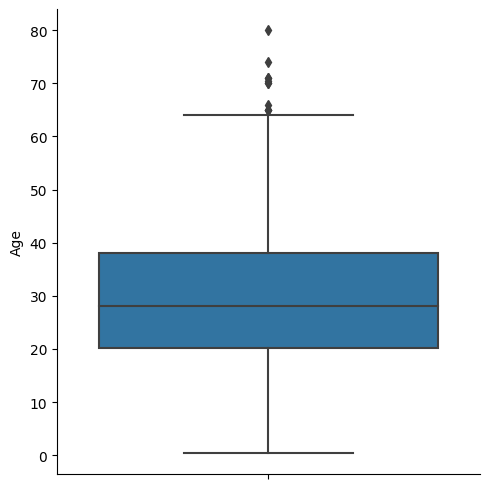

In [12]:
# boxplot
sns.catplot(df,y='Age',kind='box')

In [13]:
# Are the outliers in the boxplot questionable ?
df[df['Age']>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [14]:
# missing values
(df['Age'].isnull().sum()/len(df['Age']))*100

19.865319865319865

#### Conclusion :
* From the descriptive summary it is observed that highest aged passenger is of age *80* and lowest aged passenger is an infant.
* It can be observed from the density plot and histogram that most of the passengers are between the age of *20-40*. There are very few passengers over the age 70.
* Boxplot suggests that 'Age' column has outliers, but scrutinizing the data which are considered as outliers by the boxplot it can be concluded that there is nothing considered to be questionable in those outliers.
* Approximately *20%* observations are missing. 

### **4.2 Fare**

In [15]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


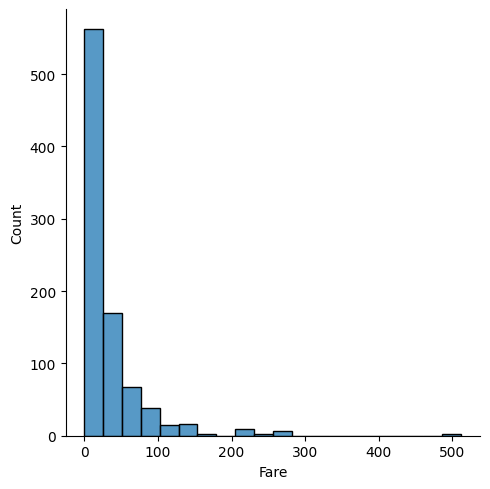

In [16]:
# histogram
sns.displot(df,x='Fare',bins=20,kind='hist')

In [17]:
# skewness
df['Fare'].skew()

4.787316519674893

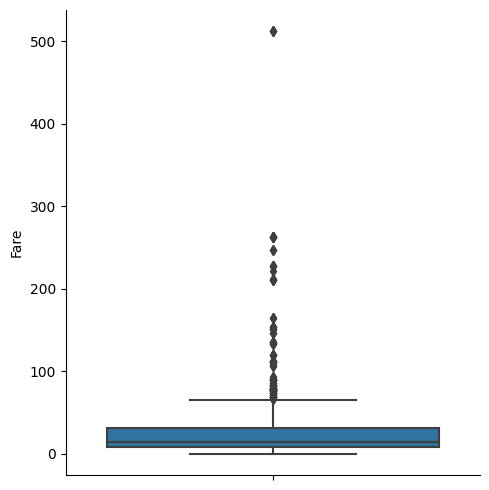

In [18]:
# identifying outlier
sns.catplot(df,y='Fare',kind='box')

In [19]:
# observing outliers
df[df['Fare']>250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [20]:
# missing values
df['Fare'].isnull().sum()

0

#### Conclusion :
* From the statistical summary, the maximum fare paid by a passenger *512.3292 dollars* and there is someone(or more) who is travelling for free. Standard deviation is very high.
* Highly positively skewed.
* There are so many observations which are considered as earlier. But this happens because most of the passengers have paid an amount of *0-150 dollars* but there are very few persons who have paid over *200 dollars*.

**But but but**, there is one problem which is there are some rows which gives us the fare of the overall family(see "df[df['Fare']>250]"). Thats why, we are getting those large amount of fare like 512 dollars. It gives us a wrong picture of this column hence we must note this and modify it to transform into the individual fare in the *Feature engineering* section. 
* There is no missing value.

### **4.3 Survived**

In [21]:
# getting data on how many of them survived and how many not
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: ylabel='count'>

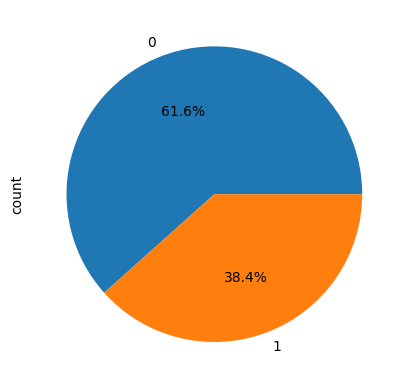

In [22]:
# getting data on how many of them survived and how many not based on 'Plot'
df['Survived'].value_counts().plot(kind='pie',autopct = '%0.1f%%')

In [23]:
# missing values
df['Survived'].isnull().sum()

0

#### Conclusion :
* There are *342 passengers* who has survived and *549 passengers* were deceased.
* There are no missing data.

### **4.4 Pclass**

In [24]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: ylabel='count'>

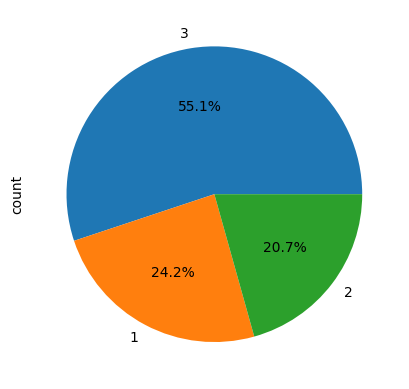

In [25]:
df['Pclass'].value_counts().plot(kind='pie',autopct = '%0.1f%%')

In [26]:
df['Pclass'].isnull().sum()

0

### **4.5 Sex**

In [27]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: ylabel='count'>

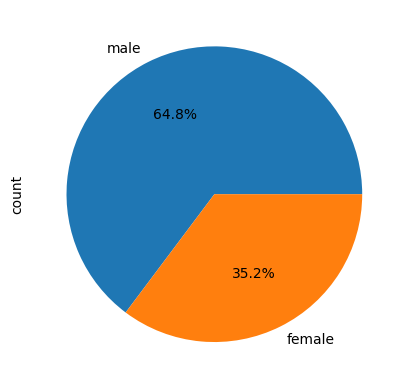

In [28]:
df['Sex'].value_counts().plot(kind='pie',autopct = '%0.1f%%')

In [29]:
df['Survived'].isnull().sum()

0

### **4.6 Sibsp**

In [30]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

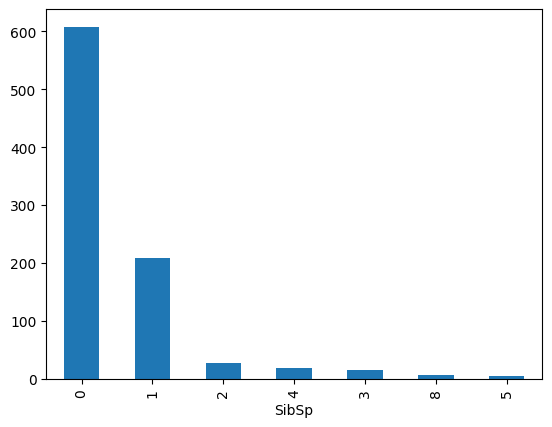

In [31]:
df['SibSp'].value_counts().plot(kind='bar')

### **4.7 Parch**

In [32]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [33]:
df['Parch'].isnull().sum()

0

### **4.8 Embarked**

In [34]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: ylabel='count'>

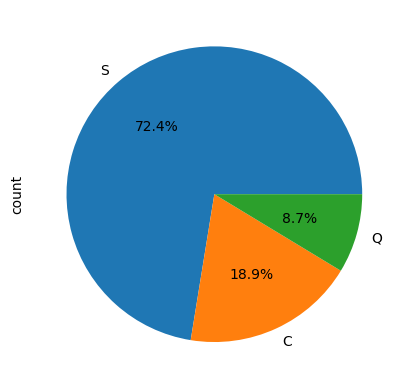

In [35]:
df['Embarked'].value_counts().plot(kind='pie',autopct = '%0.1f%%')

In [36]:
df['Embarked'].isnull().sum()

2

#### Conclusion from section 4.4,4.5,4.6,4.7 and 4.8:
* Note that, in general it happens that number of persons decreases as the class of the ticket increases. But here is a exception which is approx 55% persons were travelling in the 3rd class and approx 24% in the 1st class whereas remaining 21% are travelling in the 2nd class. There is no null value in thsi column.
* Among the total passengers there are 577 males and 314 females.
* From the analysis of 'SibSp' column, it can be observed that from the total of 891 passengers there are 608 passengers who are travelling alone i.e they are travelling without their spouse and siblings.
* From the analysis of 'ParCh' column, it can be observed that from the total of 891 passengers there are 678 passengers who are travelling without their parents and children.


**But note that,the columns 'SibSp' and 'Parch' give the companion with whom the travellers are travelling.There is no need to exist these two seperate columns. They must be merged in a new column named 'family size'.** 
**A new column can also be formed named "is_alone". It helps us to observe is there any relationship of travelling alone and getting survived in the future sections.**
* From the 'embarked' column, it can be observed that most of the passengers boarded the ship from *Southampton(from where the Ritanic started its journey)*. Titanic take two stops in the middle of the journey which are at *Cherbourg* and *Queenstown* from where *168* and *77* passengers boarded the ship respectively. There are *2* null values in this column.

<a id="Section-seven" ></a>
# **5. Bivariate analysis**

#### Note that, if we want to proceed for bivariate analysis then we have 11x10 = 110 combinantions of columns which is not feasible for us. Thats why, we must understand what is the column of respose variable in this data.
**For this data, the response variable is "Survived"** We will compare this "Survived" column with all the other columns.

### **5.1 Survived and Pclass (Categorical - Categorical)**

In [37]:
# crosstable of Pclass and Survived in percentage
pd.crosstab(df['Survived'],df['Pclass'],normalize = 'columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

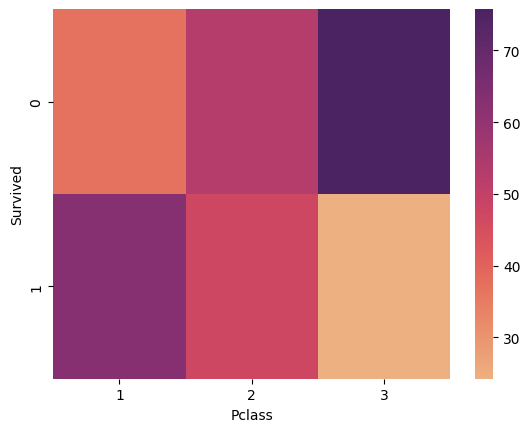

In [38]:
# Heatmap of Pclass and Survived
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'],normalize = 'columns')*100,cmap='flare')

#### Conclusion
Clearly, the heatmap depicts that it is *safer* to travel in Pclass 1 and dark violet color represents that it is **dangerous to be in Pclass 3**.

### **5.2 Survived and Sex (Categorical - Categorical)**

In [39]:
# crosstable of Sex and Survived in percentage
pd.crosstab(df['Survived'],df['Sex'],normalize = 'columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


<Axes: xlabel='Sex', ylabel='Survived'>

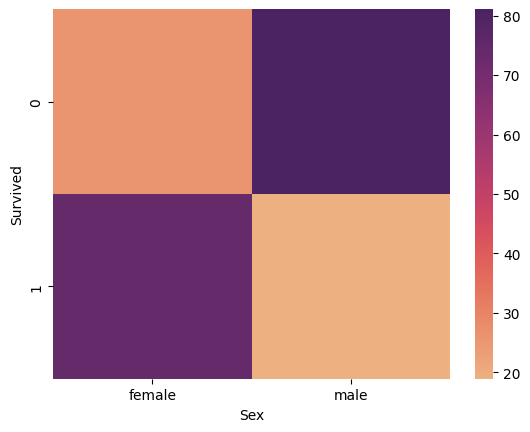

In [40]:
# Heatmapof Sex and Survived
sns.heatmap(pd.crosstab(df['Survived'],df['Sex'],normalize = 'columns')*100,cmap='flare')

#### Conclusion
Clearly, the first priority of availing the rescue boats are given to the **females** which is also observed from the heatmap that number of survived males is much lower than survived females.

### **5.3 Survived and Embarked (Categorical - Categorical)**

In [41]:
# crosstable of Sex and Survived in percentage
pd.crosstab(df['Survived'],df['Embarked'],normalize = 'columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


<Axes: xlabel='Embarked', ylabel='Survived'>

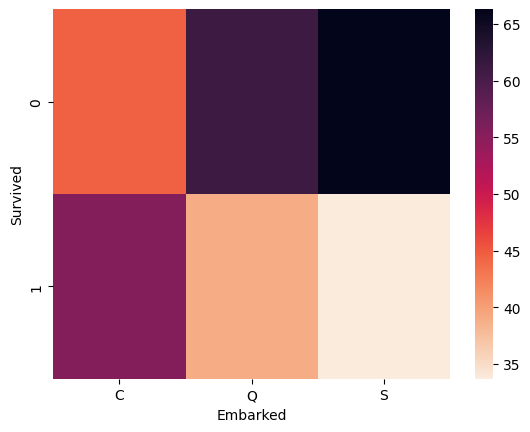

In [42]:
sns.heatmap(pd.crosstab(df['Survived'],df['Embarked'],normalize = 'columns')*100,cmap='rocket_r')

In [43]:
# checking the reasons for the higher survival rate for "Cheboug(C)" in terms of sex
pd.crosstab(df['Sex'],df['Embarked'],normalize = 'columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [44]:
# checking the reasons for the higher survival rate for "Cheboug(C)" in terms of Pclass
pd.crosstab(df['Pclass'],df['Embarked'],normalize = 'columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


#### Conclusion
Logically, there must not be any connection of getting survived and the port of embarkment. But it is seen that, the passengers who embarked the ship from **"Queenstown(Q)" and "Southhampton(H)"** are more prone to die. So, the reasons for getting higher surival rate for the passengers embarked from **Cherboug(C)** can be **higher number of females** or **higher number of Pclass 1 passengers** or **both**.

**We must check the above statement.**

Note that, after further analysis it is noticable from the above cross table for **'Sex' vs 'Embarked'** that male-female proportion in Cherboug(C) and Queenstown(Q) are similar, hence **higher number of females** is not the reason for the higher survival rate in the Cherboug(C). But, there is a huge difference if we consider the **Pclass vs Embarked** cross table. In that table, there is above **50%** of the passengers who **were in Pclass 1 , which is the reason for higher survival rate in Cherboug(C).**



### **5.4 Survived and Age (Categorical - Numerical)**

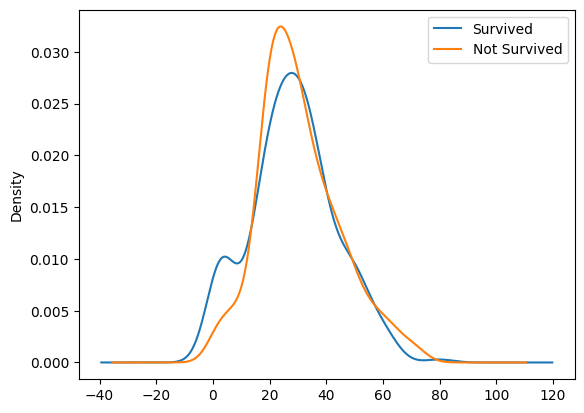

In [45]:
df[df['Survived'] == 1]['Age'].plot(kind='kde',label='Survived')
df[df['Survived'] == 0]['Age'].plot(kind='kde',label='Not Survived')
plt.legend()
plt.show()

#### Conclusion
From the density plot, it is clear that the survival rate for the children between 0-5 is greater. But for the age group 18-60, the survived curve has dominated the not survived curve in most of the part. It is clear that, **the children and the persons aged over 60 were given the first priority of getting survived.**

*********************************************************
**Note that, in the previous sections, relationship between the columns named "Fare","SibSp" and "Parch" with the "Survived" columns are not done. As we want to proceed for feature engineering on those columns.**
********************************************************

In [46]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**********
****************

<a id="Section-eight" ></a>
# **6. Feature Engineering**

### **6.1 On "Fare" column**

In [47]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [48]:
df[df['SibSp']==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


**Remark:** Note from the above, they are of same family. notice there surname and fare. But their ticket numbers are same.
We will find out all his family memebers with that same ticket number below.

In [49]:
df[df['Ticket']=='CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [50]:
df[df['Name'].str.contains('Sage')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


**Remark:** From the above, it can be seen that there are only "7" rows with the same ticket number and surname "Sage". **But, from the data there are 11 individuals with that ticket number.** 4 persons with same numbers are missing.

Hence, it must be in the **"trial.csv"** dataset.
Now, we will check this, whether our assumption is right or wrong.

In [51]:
df1 = pd.read_csv('/kaggle/input/titanic/test.csv')

In [52]:
# concatenate the two datasets
df = pd.concat([df,df1])

In [53]:
# checking again
df[df['Ticket']=='CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
342,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


**Remark:** Now, this is right. In the last dataframe there are 11 rows attributiong to 11 passengers with same ticket number.

Now, to get individual fare of each passenger in the "train.csv" dataset, we can add a **new column by dividing the "Fare" by total of "SibSp" and "Parch".**

In [54]:
df['individual_fare']=df['Fare']/(df['SibSp']+df['Parch']+1)

In [55]:
# new column representing family size
df['family_size'] = df['SibSp']+df['Parch']+1

In [56]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1


**transforming the family_size column into category**
- 1 : alone
- 2-4 : small
- greater than 5 : large



In [57]:
def transform_family_size(num) : 
    if num ==1 :
        return 'alone'
    elif num>1 and num<5 :
        return 'small'
    else:
        return 'large'
df['family_type'] = df['family_size'].apply(transform_family_size)

In [58]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,alone
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,alone
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,alone
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,alone


**Now, we want to see the relationship between the family_type and the Survived column.**

**********************
*************************

### **5.5 Survived and family_type (Categorical - Categorical)**

In [59]:
pd.crosstab(df['Survived'],df['family_type'],normalize = 'columns')*100

family_type,alone,large,small
Survived,,,
0.0,69.646182,83.870968,42.123288
1.0,30.353818,16.129032,57.876712


#### Conclusion
Clearly, if any passenger were travelling in a **small** family, then he/she must have the higher probability of surviving.

In [60]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,alone
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,alone
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,alone
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,alone


### **5.6 Survived and deck (Categorical - Categorical)**

**Now, we should focus on Cabin column.** We want to extract only the alphabet from the cabin and delet the number after it. As our aim is to observe different types of cabin has different types of survival rate or not. We are not concerned with the exact cabin rather we are concerned with the cxabin type.

We must learn about the Cabin structure of the Titanic cabin which is given below.


The boat deck, on which the lifeboats were housed. It was from here during the early hours of 15 April 1912 that Titanic's lifeboats were lowered into the North Atlantic. The bridge and wheelhouse were at the forward end, in front of the captain's and officers' quarters. The bridge stood 8 feet (2.4 m) above the deck, extending out to either side so that the ship could be controlled while docking. The wheelhouse stood within the bridge. The entrance to the First Class Grand Staircase and gymnasium were located midships along with the raised roof of the First Class lounge, while at the rear of the deck were the roof of the First Class smoke room and the Second Class entrance. Just forward of the Second Class entrance sat the kennels, where the First Class passengers' dogs would stay. The wood-covered deck was divided into four segregated promenades: for officers, First Class passengers, engineers, and Second Class passengers respectively. Lifeboats lined the side of the deck except in the First Class area, where there was a gap so that the view would not be spoiled.
* **A Deck**, also called the promenade deck, extended along the entire 546 feet (166 m) length of the superstructure. It was reserved exclusively for First Class passengers and contained First Class cabins, the First Class reading and writing room, lounge, smoke room, and Palm Court.
* **B Deck**, the bridge deck, was the top weight-bearing deck and the uppermost level of the hull. More First Class passenger accommodations were located here with six palatial staterooms (cabins) featuring their own private promenades. On Titanic, the à la carte restaurant and the Café Parisien provided luxury dining facilities to First Class passengers. Both were run by subcontracted chefs and their staff; all were lost in the disaster. The Second Class smoking room and entrance hall were both located on this deck. The raised forecastle of the ship was forward of the bridge deck, accommodating Number 1 hatch (the main hatch through to the cargo holds), numerous pieces of machinery and the anchor housings.Aft of the bridge deck was the raised poop deck, 106 feet (32 m) long, used as a promenade by Third Class passengers. It was where many of Titanic's passengers and crew made their last stand as the ship sank. The forecastle and poop deck were separated from the bridge deck by well decks.
* **C Deck**, the shelter deck, was the highest deck to run uninterrupted from stem to stern. It included both well decks; the aft one served as part of the Third-Class promenade. Crew cabins were housed below the forecastle and Third-Class public rooms were housed below the poop deck. In between were the majority of First Class cabins and the Second-Class library. 
* **D Deck**, the saloon deck, was dominated by three public rooms—the First-Class reception room, the First-Class dining saloon and the Second-Class dining saloon. The first- and second-class galleys were also located on this deck. An open space was provided for Third Class passengers. First, Second- and Third-Class passengers had cabins on this deck, with berths for firemen located in the bow. It was the highest level reached by the ship's watertight bulkheads (though only by eight of the fifteen bulkheads).
* **E Deck**, the upper deck, was predominantly used for passenger accommodation for all three classes plus berths for cooks, seamen, stewards and trimmers. Along its length ran a long passageway nicknamed 'Scotland Road', in reference to a famous street in Liverpool. Scotland Road was used by Third Class passengers and crew members.
* **F Deck**, the middle deck, mainly accommodated Second- and Third-Class passengers and several departments of the crew. The Third Class dining saloon was located here, as was the First Class bath complex, containing the swimming pool and the Turkish bath.
* G Deck**, the lower deck, had the lowest portholes, just above the waterline. The first-class squash court was located here along with the travelling post office where letters and parcels were sorted ready for delivery when the ship docked. Food was also stored here. The deck was interrupted at several points by orlop (partial) decks over the boiler, engine and turbine rooms.
* **The orlop decks**, and the tank top below that, were on the lowest level of the ship, below the waterline. The orlop decks were used as cargo spaces, while the tank top—the inner bottom of the ship's hull—provided the platform on which the ship's boilers, engines, turbines and electrical generators were housed. This area of the ship was occupied by the engine and boiler rooms, areas which passengers would have been prohibited from seeing. They were connected with higher levels of the ship by two flights of stairs in the fireman's passage; twin spiral stairways near the bow provided access up to D Deck.Ladders in the boiler, turbine, and engine rooms provided access to higher decks in those compartments.

In [61]:
# Observing cabin column
df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 1309, dtype: object

In [62]:
# checking percentage of null in this column
df['Cabin'].isnull().sum()/len(df['Cabin'])

0.774637127578304

In [63]:
# replacing "NaN" with "M"
df['Cabin'].fillna('M',inplace=True)

In [64]:
# getting counts of each kind of value
df['Cabin'].value_counts()

Cabin
M                  1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
                   ... 
A14                   1
E63                   1
E12                   1
E38                   1
C105                  1
Name: count, Length: 187, dtype: int64

In [65]:
# making a new column named deck
df['deck'] = df['Cabin'].str[0]

In [66]:
# Crosstable between deck and Pclass
pd.crosstab(df['deck'],df['Pclass'])

Pclass,1,2,3
deck,,,
A,22,0,0
B,65,0,0
C,94,0,0
D,40,6,0
E,34,4,3
F,0,13,8
G,0,0,5
M,67,254,693
T,1,0,0


<Axes: xlabel='deck'>

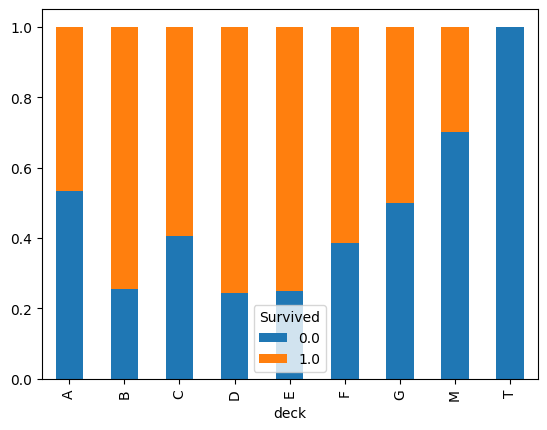

In [67]:
# Crosstable between deck and Survived
pd.crosstab(df['deck'],df['Survived'],normalize='index').plot(kind='bar',stacked=True)

#### Conclusion
Hence, the deck type affects the survival chance which can be observed from the barplot.

<a id="Section-nine" ></a>
# **7. Multivariate Analysis**

In [68]:
# correlation matrix
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,individual_fare,family_size
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428,0.035365,-0.031437
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.221600,0.016639
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629,-0.504270,0.050027
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740,0.193545,-0.240229
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238,-0.089807,0.861952
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539,-0.065498,0.792296
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000,0.832029,0.226492
individual_fare,0.035365,0.221600,-0.504270,0.193545,-0.089807,-0.065498,0.832029,1.000000,-0.094874
family_size,-0.031437,0.016639,0.050027,-0.240229,0.861952,0.792296,0.226492,-0.094874,1.000000


In [69]:
# correlation with other columns with survival columns'
df.corr(numeric_only=True)['Survived']

PassengerId       -0.005007
Survived           1.000000
Pclass            -0.338481
Age               -0.077221
SibSp             -0.035322
Parch              0.081629
Fare               0.257307
individual_fare    0.221600
family_size        0.016639
Name: Survived, dtype: float64

<Axes: >

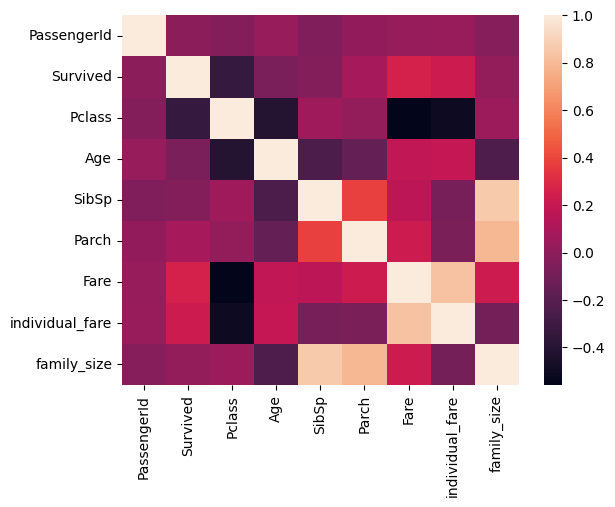

In [70]:
# heatmap for correlation matrix
sns.heatmap(df.corr(numeric_only=True))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

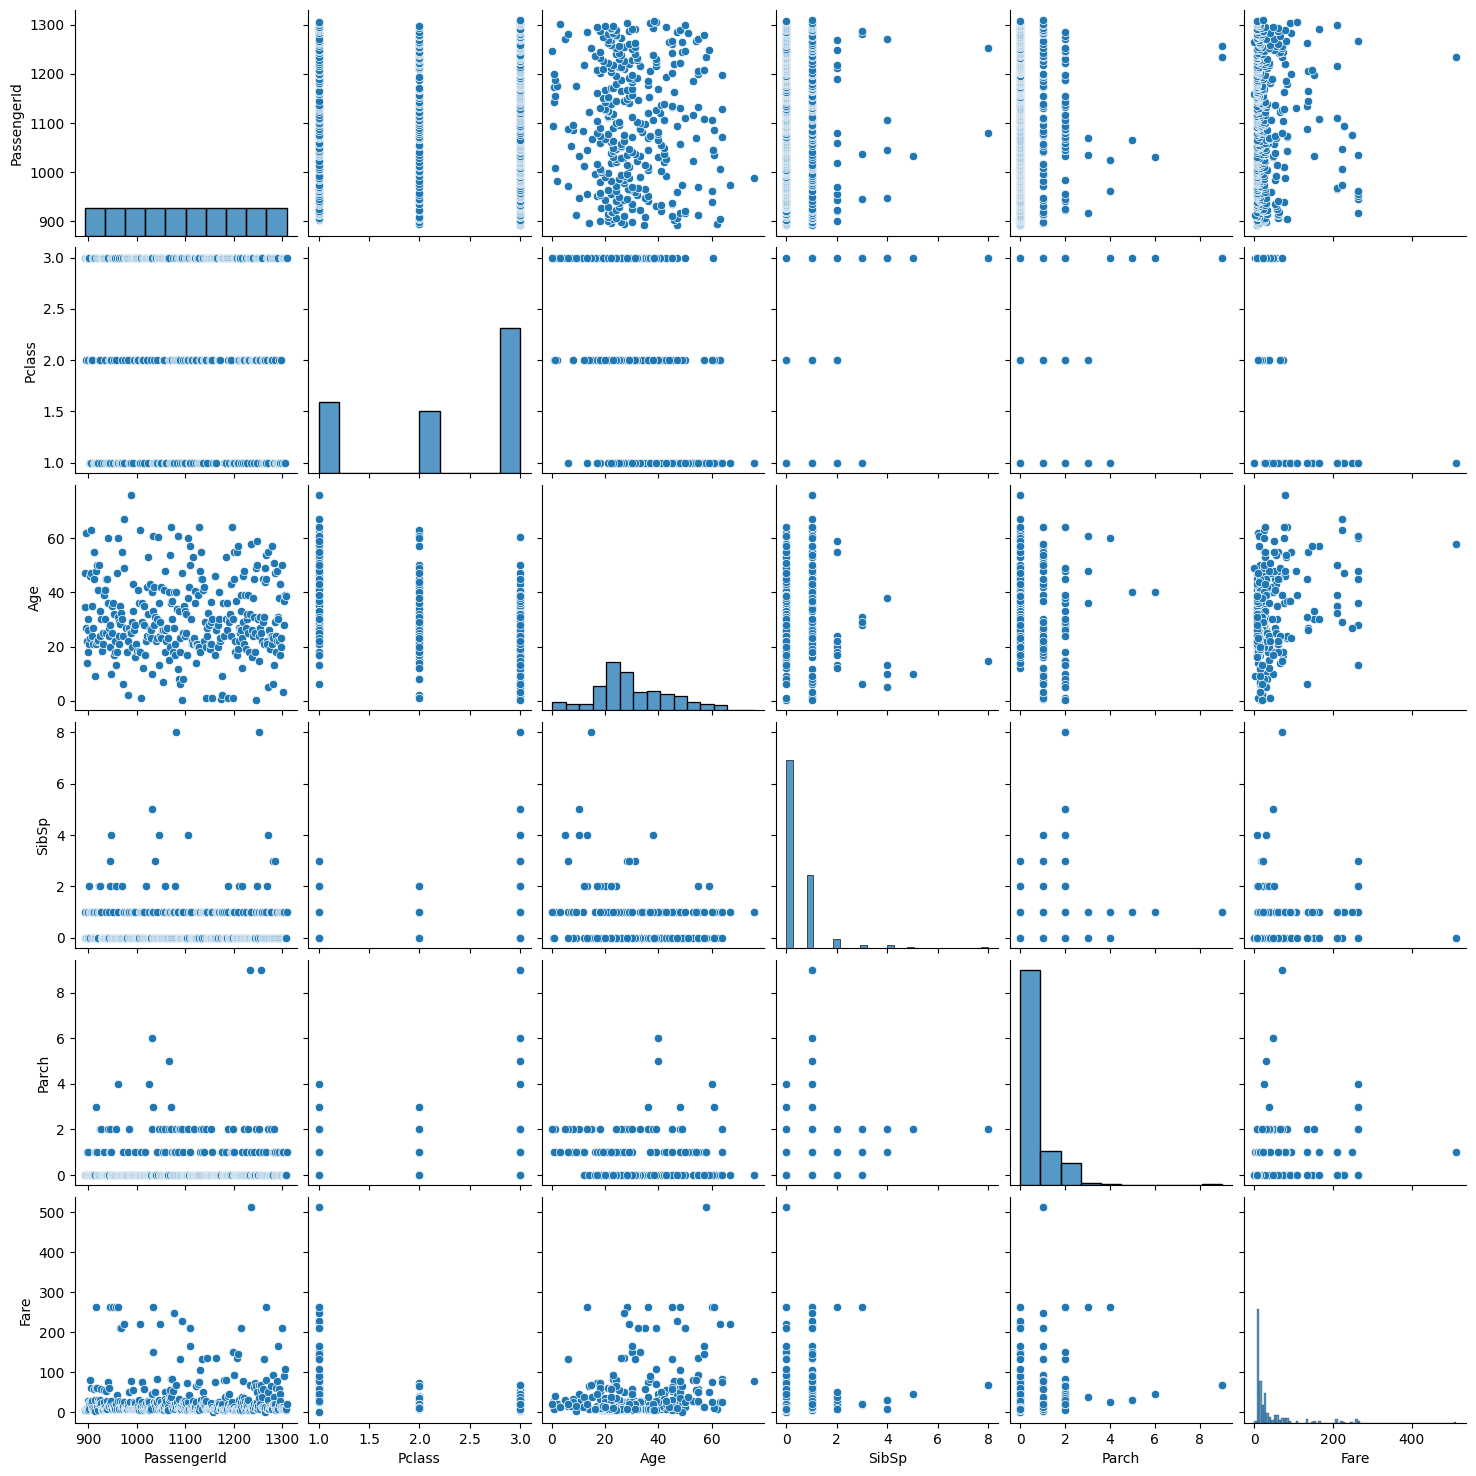

In [71]:
sns.pairplot(df1)

<a id="Section-ten" ></a>
# **8. Logistic Regression**

**From the previous EDA,** it is clear that survival probability is related to the columns "Age", "Pclass", "SibSp", "Parch", "Fare", "Sex" and "Embarked".


In the following steps, we will make some changes on the regressor variables column. We will transform the categorical column to **dummy numerical columns**.

<Axes: >

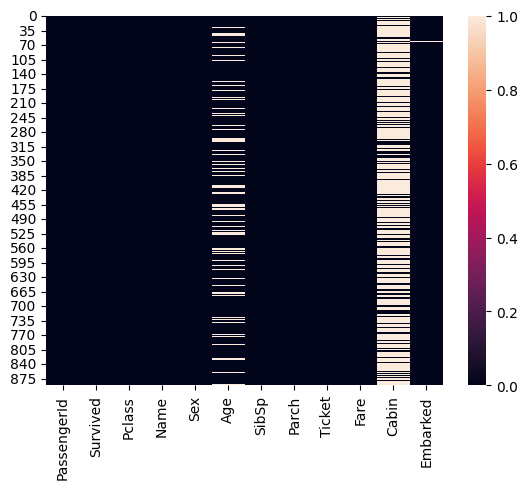

In [72]:
# getting a overview of null values
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df1 = pd.read_csv('/kaggle/input/titanic/test.csv')
sns.heatmap(df.isnull())

<Axes: >

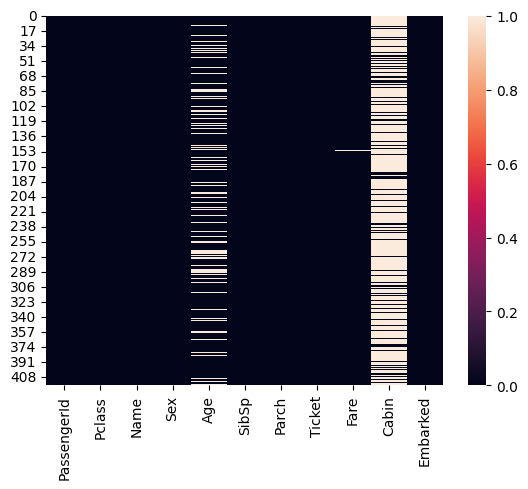

In [73]:
sns.heatmap(df1.isnull())

**Note :**  The "Age" column has about 20% of the missing observations and the "Cabin" column has about 78% missing observations. 
It is not feasible to use the column "Cabin" to our regression. We will discard this column.

In [74]:
# filling age and fare column
df['Age'] = df['Age'].fillna(df['Age'].mean())
df1['Age'] = df['Age'].fillna(df['Age'].mean())
df1['Fare'] = df['Fare'].fillna(df['Fare'].mean())


In [75]:
# drop cabin column
df.drop('Cabin',axis=1,inplace=True)
df1.drop('Cabin',axis=1,inplace=True)

**Our aim is to transform the column "Sex" and "Embarked" column to dummies numerical values.**

In [76]:
df['gender'] = pd.get_dummies(df['Sex'],drop_first=True).astype('int')
df1['gender'] = pd.get_dummies(df1['Sex'],drop_first=True).astype('int')


In [77]:
df = pd.concat([df,pd.get_dummies(df['Embarked']).astype('int')],axis=1)
df1 = pd.concat([df1,pd.get_dummies(df1['Embarked']).astype('int')],axis=1)

In [78]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,gender,C,Q,S
0,892,3,"Kelly, Mr. James",male,22.0,0,0,330911,7.2500,Q,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,38.0,1,0,363272,71.2833,S,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,26.0,0,0,240276,7.9250,Q,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,35.0,0,0,315154,53.1000,S,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,35.0,1,1,3101298,8.0500,S,0,0,0,1


In [79]:
df.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)
df1.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [80]:
df1.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,gender,C,Q,S
0,892,3,22.0,0,0,7.2500,1,0,1,0
1,893,3,38.0,1,0,71.2833,0,0,0,1
2,894,2,26.0,0,0,7.9250,1,0,1,0
3,895,3,35.0,0,0,53.1000,1,0,0,1
4,896,3,35.0,1,1,8.0500,0,0,0,1


In [81]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,gender,C,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,0,1


In [82]:
# Importing packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [83]:
x_train = df[['Pclass','Age','Fare','gender','SibSp','Parch','C','Q','S']]
y_train = df['Survived']
x_test = df1[['Pclass','Age','Fare','gender','SibSp','Parch','C','Q','S']]

In [84]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
# predict
predict = lr.predict(x_test)
predict = pd.DataFrame(predict, columns=['Survival Prediction'])
predict

,Survival Prediction
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [86]:
# submission file making
submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [87]:
submission.drop('Survived',axis=1,inplace=True)
submission

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [88]:
final_submission_file=pd.concat([submission,predict],axis=1)

In [89]:
final_submission_file.rename(columns = {'Survival Prediction' : 'Survived'},inplace=True)
final_submission_file

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [90]:
# saving the file in output
final_submission_file.to_csv('final_submission_file.csv',index=True)